In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from PIL import Image
import matplotlib.image as mpg
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [55]:
data = pd.read_csv('age_gender.csv')

In [56]:
data = data.sample(frac=1).reset_index().loc[0:1000]

In [57]:
def Convert(string):
    li = list(string.split(" "))
    return li
  

In [58]:
PIXELS=[]
for i in range(len(data)):
    PIXELS.append(Convert(data.pixels[i]))

In [59]:
NEW_PIXELS = []
for p in range(len(PIXELS)):
    new_pixels = []
    for q in range(len(PIXELS[p])):
        new_pixels.append(int(PIXELS[p][q]))
    NEW_PIXELS.append(np.array(new_pixels).reshape((48,48,1)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


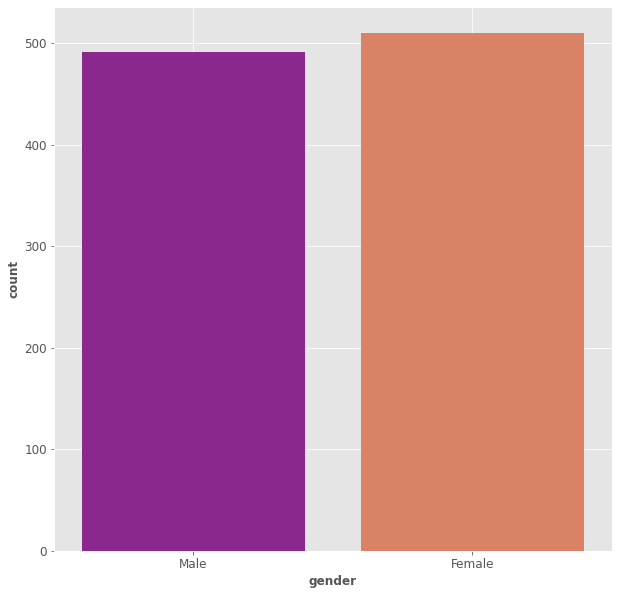

In [60]:
images = np.array(NEW_PIXELS)
data = data.drop(columns=['index','img_name'])
sns.countplot(data.gender,palette='plasma')
plt.xticks([0,1],['Male','Female'])
plt.grid(True)

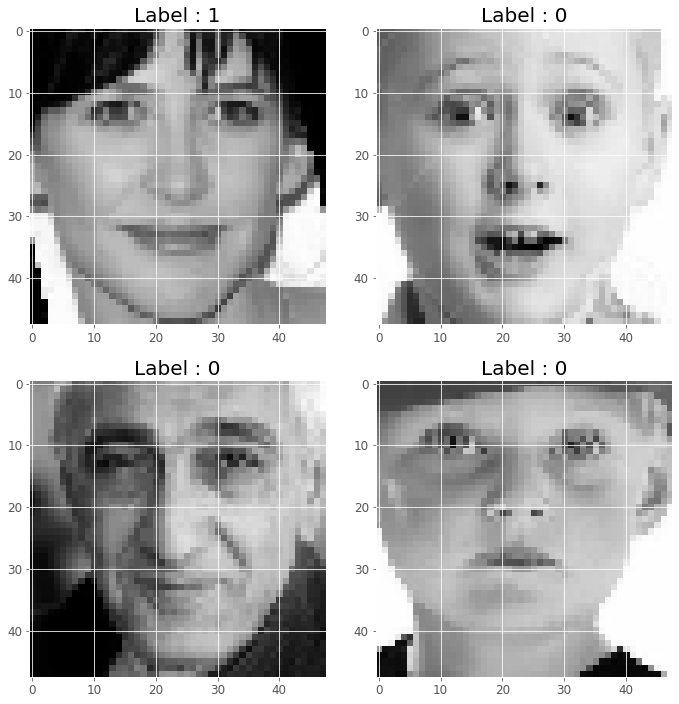

In [61]:
data.pixels = NEW_PIXELS
for i in range(1,5):
    J = np.random.choice(np.arange(0,1000,1))
    plt.subplot(2,2,i)
    plt.title('Label : '+ str(data.gender[J]),fontsize=20)
    plt.imshow(np.array(data.pixels[J]).reshape((48,48)),cmap='gray')
    plt.tight_layout()

In [62]:

classifier = Sequential()
size = 48
# Step 1 - Convolution
classifier.add(Conv2D(64, (2, 2), input_shape = (size,size, 1), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (2, 2), input_shape = (size,size, 1), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

#classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [63]:
labels = np.array(data.gender)

In [64]:
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.15)

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(train_images, train_labels, epochs=10, 
                validation_data=(test_images, test_labels),batch_size=10)

Epoch 1/10
85/85 [==============================] - 4s 38ms/step - loss: 1.6759 - accuracy: 0.6200 - val_loss: 0.5846 - val_accuracy: 0.7219
Epoch 2/10
85/85 [==============================] - 3s 36ms/step - loss: 0.4729 - accuracy: 0.7824 - val_loss: 0.5091 - val_accuracy: 0.7086
Epoch 3/10
85/85 [==============================] - 3s 36ms/step - loss: 0.3837 - accuracy: 0.8376 - val_loss: 0.5136 - val_accuracy: 0.7748
Epoch 4/10
85/85 [==============================] - 3s 35ms/step - loss: 0.3354 - accuracy: 0.8635 - val_loss: 0.4876 - val_accuracy: 0.7815
Epoch 5/10
85/85 [==============================] - 3s 36ms/step - loss: 0.3206 - accuracy: 0.8718 - val_loss: 0.4700 - val_accuracy: 0.7815
Epoch 6/10
85/85 [==============================] - 3s 36ms/step - loss: 0.2601 - accuracy: 0.9024 - val_loss: 0.5135 - val_accuracy: 0.7881
Epoch 7/10
85/85 [==============================] - 3s 35ms/step - loss: 0.2309 - accuracy: 0.9094 - val_loss: 0.5198 - val_accuracy: 0.7351
Epoch 8/10
85

In [65]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

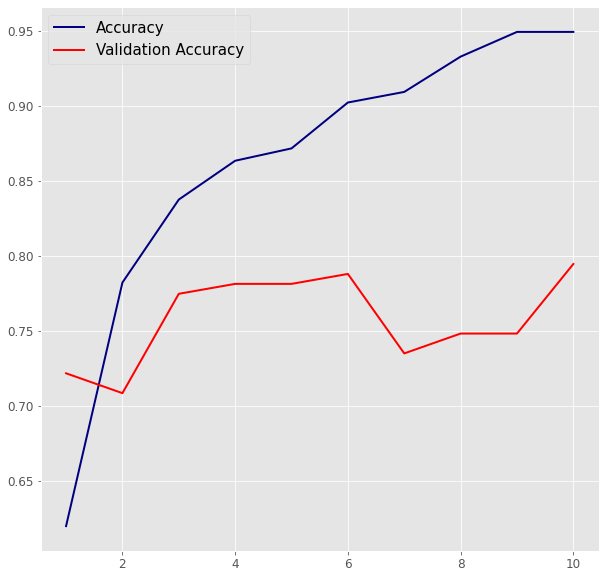

In [66]:
plt.plot(np.arange(1,len(loss)+1,1),loss,color='navy', label = 'Accuracy')
plt.plot(np.arange(1,len(loss)+1,1),val_loss,color='red',label='Validation Accuracy')
plt.legend(fontsize=15)

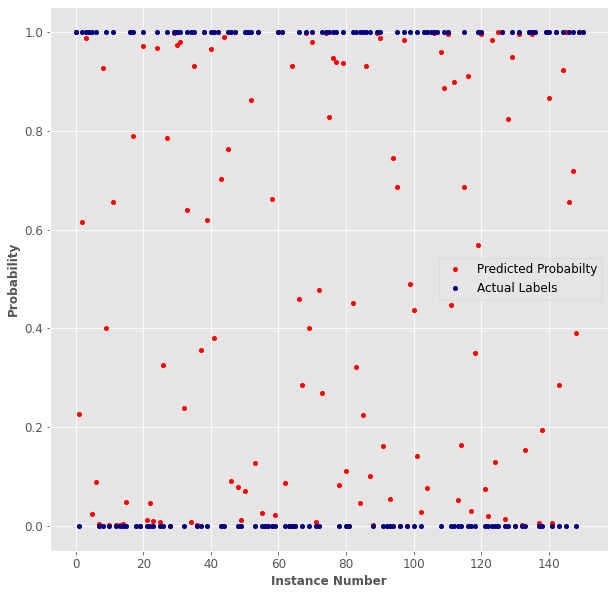

In [67]:
plt.plot(classifier.predict(test_images),'.',color='red',label='Predicted Probabilty')
plt.plot(test_labels,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [68]:
predictions = classifier.predict(test_images)

In [69]:
decision = []

for p in predictions:
    if p>=0.5:
        decision.append(1)
    else:
        decision.append(0)

([<matplotlib.axis.YTick at 0x7f834478ab90>,
 [Text(0, 0.5, 'Male'), Text(0, 1.5, 'Female')])

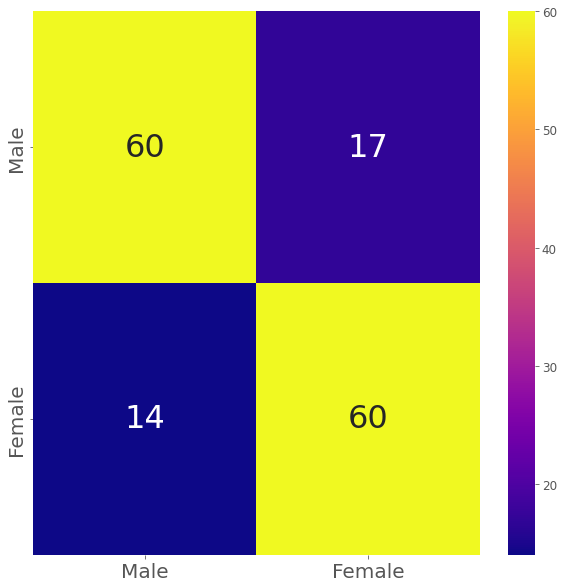

In [70]:
sns.heatmap(confusion_matrix(decision,test_labels),cmap='plasma',annot=True,annot_kws={"size": 32})
plt.xticks([0.50,1.50],['Male','Female'],fontsize=20)
plt.yticks([0.50,1.50],['Male','Female'],fontsize=20)

In [71]:
clf_report = classification_report(decision,test_labels,
                                   labels=[0,1],
                                   target_names=['Male','Female'],
                                   output_dict=True)

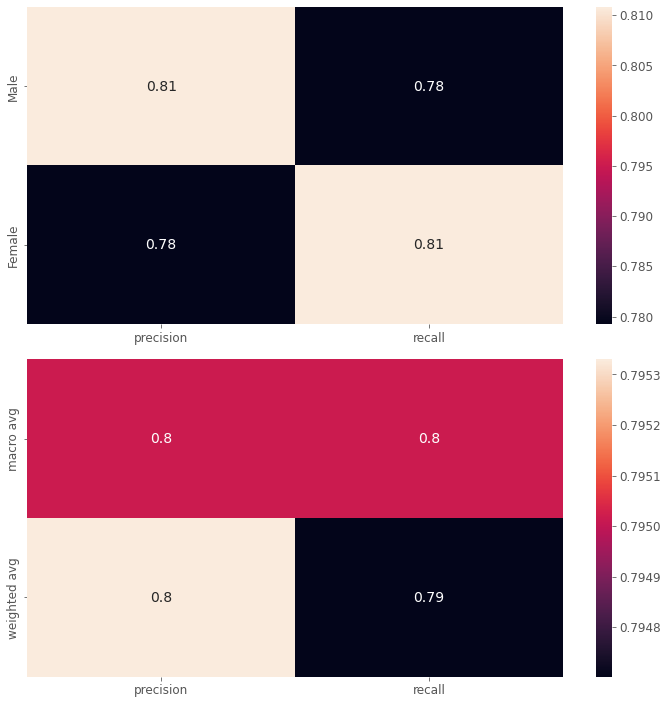

In [72]:
plt.subplot(2,1,1)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-2, :-3].T, annot=True)
plt.subplot(2,1,2)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-2, 3:].T, annot=True)
plt.tight_layout()

In [73]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [74]:
def ImagePreProcessing(image_path):
    img = Image.open(image_path)
    img = img.resize((48,48))
    img_array = np.asarray(img)
    baw_img = rgb2gray(img_array).astype(int)
    final_img = baw_img.reshape((48,48))
    return final_img

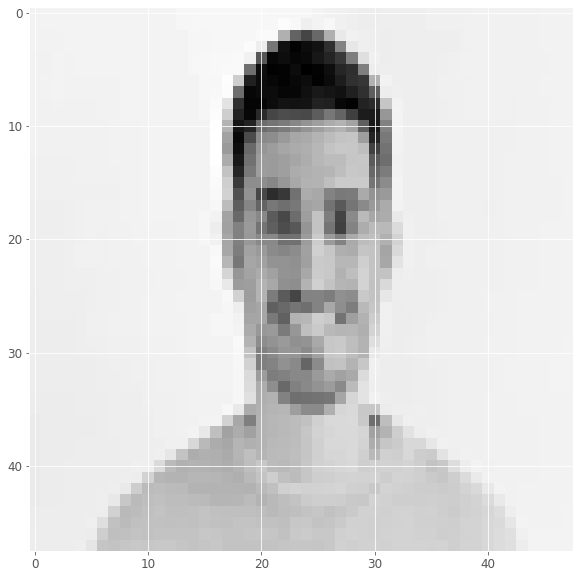

In [75]:
plt.imshow(ImagePreProcessing('test.jpg'),cmap='gray')

In [76]:
image_test = ImagePreProcessing('test.jpg')

In [77]:
prob = 1-classifier.predict(np.array([image_test]))[0][0]

In [78]:
print("I'm a man, and the classifier says that I'm a man with probability %.2f" %(prob*100) + '%')

I'm a man, and the classifier says that I'm a man with probability 80.85%
